In [1]:
import sys
sys.path.append('../xrun')

In [5]:
import fractions

import numpy as np
import pandas as pd

from timeit import default_timer as timer

from scipy import linalg
from scipy.sparse import linalg as sparse_linalg, issparse
from sklearn.utils.sparsefuncs import mean_variance_axis
from sklearn.utils.extmath import svd_flip, safe_sparse_dot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

from xrun.data.loader import load_dataset

In [3]:
input_path = "../data/input/docword.enron.txt.gz"
X = load_dataset(input_path)

Loading BoW dataset from ../data/input/docword.enron.txt.gz
Data shape: (39861, 28102)
Elapsed time: 24.36 secs


In [6]:
start_time = timer()
U, Sigma, VT = sparse_linalg.eigen.svds(A=X, which='LM', k=1000, solver='arpack')
end_time = timer()
duration_sec = end_time - start_time
print(f"SVD computed in {duration_sec/60:.1f} minutes.")

SVD computed in 4.3 minutes.


In [7]:
# svds doesn't abide by scipy.linalg.svd/randomized_svd conventions, so reverse its outputs.
Sigma = Sigma[::-1]
U, VT = svd_flip(U[:, ::-1], VT[::-1])

In [32]:
X_transformed = safe_sparse_dot(X, VT.T)

In [33]:
explained_variance = np.var(X_transformed, axis=0)
_, full_var = mean_variance_axis(X, axis=0)
explained_variance_ratio = explained_variance / full_var.sum()

In [34]:
df_plot_data = pd.DataFrame({
    'explained_variance_ratio': explained_variance_ratio,
    'component': list(range(explained_variance_ratio.shape[0]))
})
df_plot_data["explained_variance_ratio_sum"] = df_plot_data.explained_variance_ratio.cumsum()

<AxesSubplot:xlabel='component', ylabel='explained_variance_ratio_sum'>

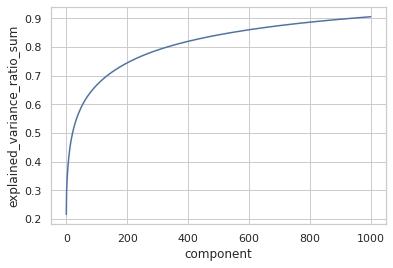

In [35]:
sns.lineplot(x='component', y='explained_variance_ratio_sum', data=df_plot_data)